# Tutorial Part 1

### This tutorial was adapted from: Machine Learning with Graphs (Stanford / Winter 2023) Code lab 1


We would use two main packages for this tutorial: NetworkX and Pytorch-Geometric

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. It provides:
*   tools for the study of the structure and dynamics of social, biological, and infrastructure networks;
*   a standard programming interface and graph implementation that is suitable for many applications;
*   a rapid development environment for collaborative, multidisciplinary projects;
*   an interface to existing numerical algorithms and code written in C, C++, and FORTRAN; and
*   the ability to painlessly work with large nonstandard data sets.


With NetworkX you can load and store networks in standard and nonstandard data formats, generate many types of random and classic networks, analyze network structure, build network models, design new network algorithms, draw networks, etc.

In [1]:
# Import the NetworkX package
import networkx as nx
import numpy as np

### Create a Graph from scratch
Step 1: Create an undirected blank graph or a directed blank graph

In [2]:
# Create an undirected graph G
G = nx.Graph()
print(G.is_directed())

# Create a directed graph H
H = nx.DiGraph()
print(H.is_directed())

False
True


Step 2: Add graph attributes (optional)

In [3]:
# Add graph level attribute
G.graph["Name"] = "Tutorial"
print(G.graph)

{'Name': 'Tutorial'}


### Add nodes and node attributes

Method 1: Add a single node and update its node attributes using **Graph.add_node(node_for_adding, attr)**:

Parameters:

node_for_adding: node

attr: keyword arguments, optional

Set or change node attributes using key=value.

In [4]:
G.add_node(0, feature=5, label=0)
G.add_node("Hello")

Method 2: Add multiple nodes using **Graph.add_nodes_from(nodes_for_adding, attr)**

In [5]:
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
]) #(node, attrdict)


Remove a node using **Graph.remove_node(n)**:

Removes the node n and all adjacent edges. Attempting to remove a non-existent node will raise an exception.

In [6]:
G.remove_node("Hello")

Get attributes of the nodes using **Graph.nodes**

A NodeView of the Graph as G.nodes or G.nodes(). Also you can update the node attributes with it.

In [7]:
# Get attributes of the node 0
G.nodes[0]['feature']=3
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 3, 'label': 0}


In [8]:
# Get attributes of all the nodes
G.nodes(data=True)

NodeDataView({0: {'feature': 3, 'label': 0}, 1: {'feature': 1, 'label': 1}, 2: {'feature': 2, 'label': 2}})

In [9]:
# Add multiple nodes with attributes

# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
    print(node)

# Get number of nodes
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 3, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


### Add Edges and edge attributes

Similar to nodes, edges (with attributes) can also be easily added to NetworkX graphs.

In [10]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)

# Get attributes of the edge (0, 1)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [11]:
# Add multiple edges with edge weights
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1})
])

# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
for edge in G.edges():
  print(edge)

# Get number of edges
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1)
(0, 2)
(1, 2)
G has 3 edges


### Visualize graph

[3. 1. 2.]


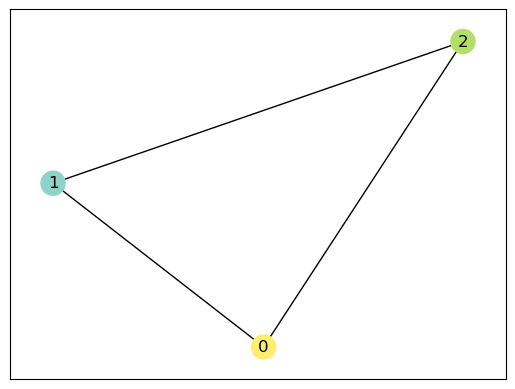

In [12]:
# Draw the graph
import matplotlib.pyplot as plt
cmap='Set3'
feature=nx.get_node_attributes(G, "feature")
color_vals = np.fromiter(feature.values(), dtype=float)
print(color_vals)
nx.draw_networkx(G,with_labels=True, node_color=color_vals, cmap=cmap)

### Adjacency matrix

to_numpy_array: Returns the graph adjacency matrix as a NumPy array.
https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.to_numpy_array.html


In [13]:
A = nx.to_numpy_array(G)
A

array([[0. , 0.5, 0.1],
       [0.5, 0. , 0.3],
       [0.1, 0.3, 0. ]])

In [14]:
G.adj

AdjacencyView({0: {1: {'weight': 0.5}, 2: {'weight': 0.1}}, 1: {0: {'weight': 0.5}, 2: {'weight': 0.3}}, 2: {1: {'weight': 0.3}, 0: {'weight': 0.1}}})

### Exercise

Task 1: Please define an undirected new graph with 7 nodes based on the given node feature list.

The connection between the nodes are {orange-yellow, red-orange, red-yellow, yellow-grey, orange-green, grey-blue, grey-purple, blue-purple, green-purple}

In [15]:
d=[
    (0, {"color": "red", "feature":np.array([0.04, 0.24, 0.54])}),
    (1, {"color": "orange", "feature":np.array([0.79, 0.93, 0.25])}),
    (2, {"color": "yellow", "feature":np.array([0.82, 0.96,  0.99])}),
    (3, {"color": "green", "feature":np.array([0.83, 0.86, 0.05])}),
    (4, {"color": "grey", "feature":np.array([0.25, 0.46,0.40])}),
    (5, {"color": "blue", "feature":np.array([0.70, 0.82, 0.73])}),
    (6, {"color": "purple", "feature":np.array([0.46, 0.39, 0.06])}),
]
##################Your answer###############################

G_1 = nx.Graph()
G_1.add_nodes_from(d)
G_1.nodes(data=True)
G_1.add_edges_from([
  (1, 2),
  (1, 0),
  (2, 0),
  (2, 4),
  (1, 3),
  (4, 5),
  (4, 6),
  (5, 6),
  (3, 6),
])

##################################################################

Task 2: What is the average degree of this graph?

In [16]:
def average_degree(num_edges, num_nodes):
  # TODO: Implement this function that takes number of edges
  # and number of nodes, and returns the average node degree of 
  # the graph. Round the result to nearest integer (for example 
  # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

  ############# Your code here ############
    avg_degree = round(2*num_edges/num_nodes)
  
  #########################################

    return avg_degree

num_edges = G_1.number_of_edges()
num_nodes = G_1.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of this graph is {}".format(avg_degree))

Average degree of this graph is 3


Task 3: Permute the numbering of the nodes in the graph. 

Hint: You can use the given random permutation array Per generated by np.random.permutation. 


In [17]:
np.random.seed(12345)
Per=np.random.permutation(7)
print(Per)

G_2=nx.Graph()
P=np.zeros((7, 7))
#TODO: Generate a graph G_2 such that the ith node in G_1 is reordered as Per[i] in G_2
#TODO2: At the mean time please give the permutation matrix P
#################Your answer######################################
for i in range(7):
    P[Per[i]][i]=1
print(P)
mapping = dict(zip(G_1, Per))
print(mapping)
G_2 = nx.relabel_nodes(G_1, mapping)
G_2.nodes(data=True)
####################################################################

[6 3 4 0 1 5 2]
[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]
{0: 6, 1: 3, 2: 4, 3: 0, 4: 1, 5: 5, 6: 2}


NodeDataView({6: {'color': 'red', 'feature': array([0.04, 0.24, 0.54])}, 3: {'color': 'orange', 'feature': array([0.79, 0.93, 0.25])}, 4: {'color': 'yellow', 'feature': array([0.82, 0.96, 0.99])}, 0: {'color': 'green', 'feature': array([0.83, 0.86, 0.05])}, 1: {'color': 'grey', 'feature': array([0.25, 0.46, 0.4 ])}, 5: {'color': 'blue', 'feature': array([0.7 , 0.82, 0.73])}, 2: {'color': 'purple', 'feature': array([0.46, 0.39, 0.06])}})

Visualize the original graph and permutated graph. Compare the two graphs and see the graph itself is symmetric with regard to the perturbation.

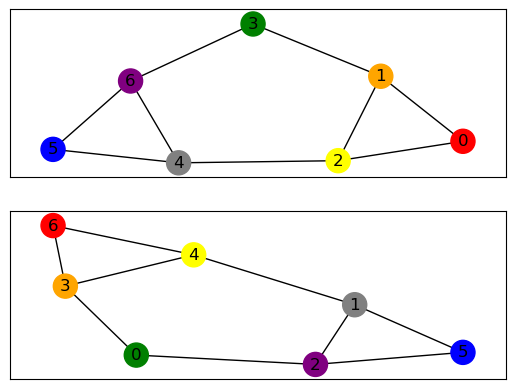

In [18]:
import matplotlib.pyplot as plt

# Draw the graph 1
plt.subplot(2, 1, 1)
feature=nx.get_node_attributes(G_1, "color")
color_vals = feature.values()
nx.draw_networkx(G_1,with_labels=True, node_color=color_vals)

# Draw the graph 2
plt.subplot(2, 1, 2)
feature=nx.get_node_attributes(G_2, "color")
color_vals = feature.values()

nx.draw_networkx(G_2,with_labels=True, node_color=color_vals)

### Bonus task

Construct a Networkx graph for the IEEE 9 bus system. What is the average node degree of your graph?


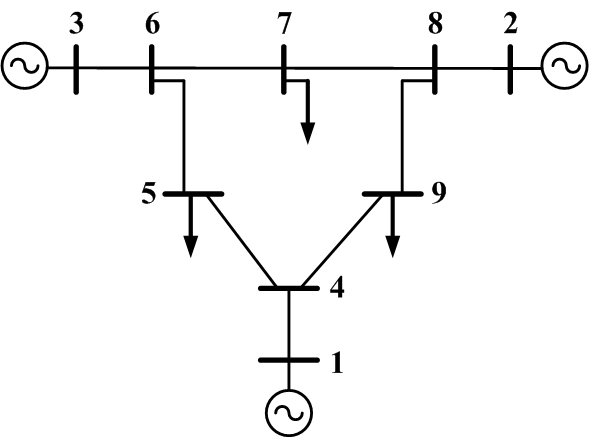

Average degree of IEEE 9 bus graph is 2


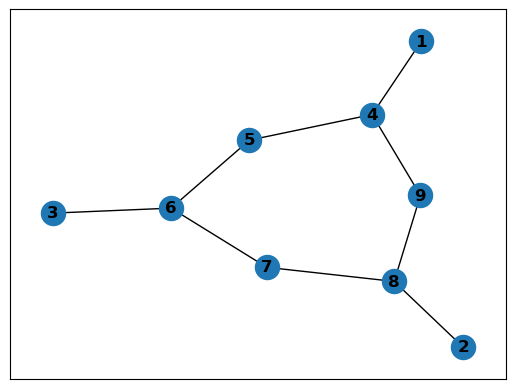

In [19]:
  ############# Your code here ############
Ieee_9_G = nx.Graph()



Ieee_9_G.add_nodes_from([1,2,3,4,5,6,7,8,9])

Ieee_9_G.add_edges_from([(1, 4), (4, 5), (4, 9), (5, 6), (9, 8), (6, 7), (7, 8), (8, 2), (3, 6)])

Ieee_average_node_degree = average_degree(Ieee_9_G.number_of_edges(), Ieee_9_G.number_of_nodes())

print("Average degree of IEEE 9 bus graph is {}".format(Ieee_average_node_degree))


nx.draw_networkx(Ieee_9_G, with_labels=True, font_weight='bold')

  #########################################

### Constructing a Graph convolutional (GCN) layer

Here, we are going to implement a GCN layer as defined by Kipf & Welling in https://arxiv.org/abs/1609.02907

$X'$ = $\tilde{D}^{-1/2}\tilde{A}\tilde{D}^{-1/2}X\Theta$ where $\tilde{A}=A+I_N$ and $\tilde{D}_{ii}=\sum_{j}{\tilde{A}_{ij}}$.

* $X'$ is the new node embedding
*  $\tilde{D}_{ii}=\sum_{j}{\tilde{A}_{ij}}$ is the diagonal degree matrix
* $\Theta$ is a learnable filter parameter
* $\tilde{D}^{-1/2}\tilde{A}\tilde{D}^{-1/2}$ is the renormalized adjacency matrix

Task 4: write a function to implement the renormalized adjacency matrix as defined above

In [20]:
from scipy.linalg import sqrtm 

def renormalized_adjacency_matrix(A, Graph):
  # TODO: Implement this function that takes the graph, and returns the normalized adjacency matrix
  ############# Your code here ############
    
    A_mod = A + np.eye(Graph.number_of_nodes()) # add self-connections
    D_mod = np.zeros_like(A_mod)
    np.fill_diagonal(D_mod, np.asarray(A_mod.sum(axis=1)).flatten())
    D_mod_invroot = np.linalg.inv(sqrtm(D_mod))
    A_hat = D_mod_invroot @ A_mod @ D_mod_invroot
  
  #########################################
    return A_hat
A_1 = nx.to_numpy_array(G_1)
A_hat_1=renormalized_adjacency_matrix(A_1,G_1)
print("The renormalized adjacency matrix of this graph is {}".format(A_hat_1))

The renormalized adjacency matrix of this graph is [[0.33333333 0.28867513 0.28867513 0.         0.         0.
  0.        ]
 [0.28867513 0.25       0.25       0.28867513 0.         0.
  0.        ]
 [0.28867513 0.25       0.25       0.         0.25       0.
  0.        ]
 [0.         0.28867513 0.         0.33333333 0.         0.
  0.28867513]
 [0.         0.         0.25       0.         0.25       0.28867513
  0.25      ]
 [0.         0.         0.         0.         0.28867513 0.33333333
  0.28867513]
 [0.         0.         0.         0.28867513 0.25       0.28867513
  0.25      ]]


Task 5: Get node features array X, s.t. the ith row of X is the feature array of node i, corresponding to the order of the graph

In [21]:
def get_node_features(Graph):
    X=list(nx.get_node_attributes(Graph, 'feature').values())
    X=np.array(X)
    return X

X_1=get_node_features(G_1)

print(X_1)

[[0.04 0.24 0.54]
 [0.79 0.93 0.25]
 [0.82 0.96 0.99]
 [0.83 0.86 0.05]
 [0.25 0.46 0.4 ]
 [0.7  0.82 0.73]
 [0.46 0.39 0.06]]


Task 6: Define the representation of the permutation matrix P on both node features and adjacency matrix/ edge features. Then compute the permutated node features X_2 and renormalized adjacency matrix, A_hat_2 correspondingly.

In [22]:
def representation_permutation_node(P, X):
  ###############Your codes here#################
  X_transformed=P@X
  ################################################
  return X_transformed

X_2=representation_permutation_node(P, X_1)
print(X_2)

[[0.83 0.86 0.05]
 [0.25 0.46 0.4 ]
 [0.46 0.39 0.06]
 [0.79 0.93 0.25]
 [0.82 0.96 0.99]
 [0.7  0.82 0.73]
 [0.04 0.24 0.54]]


In [23]:
def representation_permutation_edge(P, A):
  ############Your codes here###############################
  A_transformed=P@A@P.T
  ##############################################################
  return A_transformed

A_hat_2=representation_permutation_edge(P, A_hat_1)

Task 7: Now we can implement one GCN layer to get hidden feature X', given the input node feature matrix X, the renormalized adjacency matrix A_hat and a given parameter matrix theta. 
$X'=\hat{A}X\Theta$

In [24]:
theta=np.random.rand(3,1)

In [25]:
# you can name the hidden variables H_1 and H_2 respectively
############Your codes here##########################
H_1=A_hat_1 @ X_1 @ theta
H_2=A_hat_2 @ X_2 @ theta
#####################################

Visualize the hidden features on the original graph and see if the GCN layer is permutation equivariant?

In [26]:
for i in range(G_1.number_of_nodes()):
    G_1.nodes[i]['hidden feature']=H_1[i]

In [27]:
for i in range(G_2.number_of_nodes()):
    G_2.nodes[i]['hidden feature']=H_2[i]

dict_values([array([0.90250081]), array([1.01860276]), array([0.92523563]), array([0.68753948]), array([1.03084251]), array([0.72799963]), array([0.8674803])])


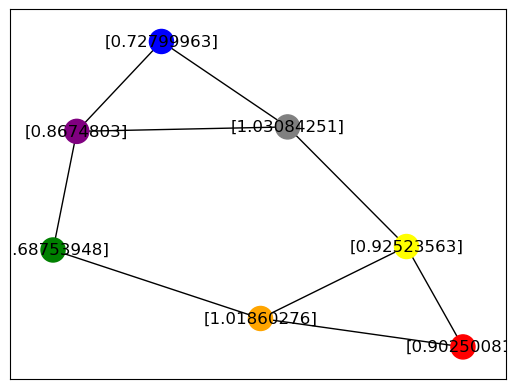

In [28]:
feature=nx.get_node_attributes(G_1, "color")
color_vals = feature.values()
labels = nx.get_node_attributes(G_1, "hidden feature")
print(labels.values())
nx.draw_networkx(G_1,labels=labels,with_labels=True, node_color=color_vals)

dict_values([array([0.90250081]), array([1.01860276]), array([0.92523563]), array([0.68753948]), array([1.03084251]), array([0.72799963]), array([0.8674803])])


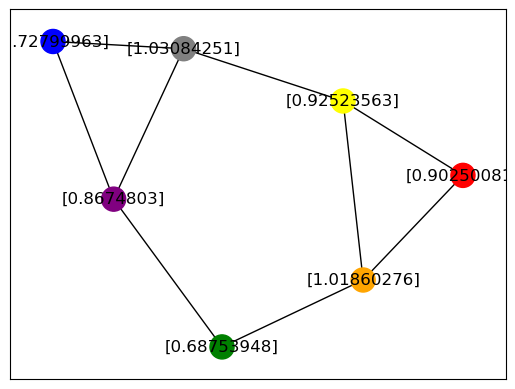

In [29]:
feature=nx.get_node_attributes(G_2, "color")
color_vals = feature.values()
labels = nx.get_node_attributes(G_2, "hidden feature")
print(labels.values())
nx.draw_networkx(G_2,labels=labels,with_labels=True, node_color=color_vals)

### What do you conclude, is the GCN layer permutation equivariant?